<a href="https://colab.research.google.com/github/HWMV/AIFFEL_Quest1/blob/master/Main_quest/Main_quest3/rock_scissor_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main_quest3
# rock_scissor_paper
# 온라인 6기 코어 최현우

* **루브릭**
1. 이미지 분류기 모델이 성공적으로 만들어졌는가?	학습과정이 정상적으로 수행되었으며, 학습 결과에 대한 그래프를 시각화(ex. train acc / train loss / val acc / val loss 등) 해 보았음
2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?	오버피팅 극복을 위하여 데이터셋의 다양성, 정규화 등을 2가지 이상 시도해보았음
3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가?	85% 이상 도달하였음

In [16]:
# 라이브러리 호출
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.14.0
1.23.5


In [17]:
# 데이터 불러오기 (로컬, 구글드라이브 마운트)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
from PIL import Image
import glob
import os

In [19]:
# 데이터 불러오기2
BASE_PATH = "/content/drive/MyDrive/Main_quest3/"

In [20]:
# paper 이미지 resize 하기 (28x28)
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 28 x 28 size 로 resize
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 함수 이용해서 가위바위보 이미지 전부 resize
resize_images(BASE_PATH + "rock")
resize_images(BASE_PATH + "scissor")
resize_images(BASE_PATH + "paper")

print("resize 완료!")


500  images to be resized.


<ipython-input-20-4fae2dba621a>:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


500  images resized.
500  images to be resized.
500  images resized.
500  images to be resized.
500  images resized.
resize 완료!


In [25]:
# load_data 함수 만들기 (노드 참조)

def load_data(img_path, number_of_data=2000):
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2
        idx=idx+1

    print("Number of images:", idx)
    return imgs, labels

# train data 설정
(x_train, y_train) = load_data(BASE_PATH)
# 데이터 정규화
x_train_norm = x_train / 255.0


Number of images: 1500


In [34]:
# 모델 구성하기 Sequestial 모델 사용 (뉴런 수 증감)
from tensorflow.keras.models import Sequential
model = Sequential()

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

# 모델 compile 하기
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

train_loss, train_accuracy = model.evaluate(x_train_norm, y_train, verbose=2)
print("train_loss: {} ".format(train_loss))
print("train_accuracy: {}".format(train_accuracy))

Epoch 1/10
63/63 [==============================] - 6s 83ms/step - loss: 0.8780 - accuracy: 0.5550
Epoch 2/10
63/63 [==============================] - 9s 138ms/step - loss: 0.5900 - accuracy: 0.7265
Epoch 3/10
63/63 [==============================] - 5s 77ms/step - loss: 0.4304 - accuracy: 0.8140
Epoch 4/10
63/63 [==============================] - 6s 89ms/step - loss: 0.3029 - accuracy: 0.8820
Epoch 5/10
63/63 [==============================] - 6s 97ms/step - loss: 0.2072 - accuracy: 0.9220
Epoch 6/10
63/63 [==============================] - 5s 77ms/step - loss: 0.1449 - accuracy: 0.9580
Epoch 7/10
63/63 [==============================] - 8s 128ms/step - loss: 0.0875 - accuracy: 0.9775
Epoch 8/10
63/63 [==============================] - 5s 77ms/step - loss: 0.0730 - accuracy: 0.9815
Epoch 9/10
63/63 [==============================] - 5s 82ms/step - loss: 0.0490 - accuracy: 0.9880
Epoch 10/10
63/63 [==============================] - 7s 106ms/step - loss: 0.0323 - accuracy: 0.9935
63/63 

In [27]:
# Load test data
# 위 과정 경로만 바꿔서 test data 세팅 (연님 사진)
resize_images(BASE_PATH + "test/rock")
resize_images(BASE_PATH + "test/scissor")
resize_images(BASE_PATH + "test/paper")
(x_test, y_test) = load_data(BASE_PATH + "test")
x_test_norm = x_test / 255.0

100  images to be resized.


<ipython-input-20-4fae2dba621a>:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
Number of images: 300


In [28]:
# Model evaluation
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

63/63 - 1s - loss: 0.6062 - accuracy: 0.9465 - 1s/epoch - 23ms/step
test_loss: 0.6061707735061646 
test_accuracy: 0.9465000033378601


In [29]:
# 시각화 해봅자
import matplotlib.pyplot as plt

history = model.fit(x_train_norm, y_train,
                    epochs=10,
                    validation_data=(x_test_norm, y_test))

Epoch 1/10
63/63 [==============================] - 12s 187ms/step - loss: 0.0815 - accuracy: 0.9785 - val_loss: 0.5756 - val_accuracy: 0.9460
Epoch 2/10
63/63 [==============================] - 7s 111ms/step - loss: 0.0461 - accuracy: 0.9925 - val_loss: 0.6383 - val_accuracy: 0.9480
Epoch 3/10
63/63 [==============================] - 10s 161ms/step - loss: 0.0401 - accuracy: 0.9930 - val_loss: 0.6252 - val_accuracy: 0.9475
Epoch 4/10
63/63 [==============================] - 6s 97ms/step - loss: 0.0290 - accuracy: 0.9955 - val_loss: 0.7637 - val_accuracy: 0.9480
Epoch 5/10
63/63 [==============================] - 8s 130ms/step - loss: 0.0306 - accuracy: 0.9920 - val_loss: 0.7113 - val_accuracy: 0.9465
Epoch 6/10
63/63 [==============================] - 6s 96ms/step - loss: 0.0174 - accuracy: 0.9975 - val_loss: 0.7761 - val_accuracy: 0.9480
Epoch 7/10
63/63 [==============================] - 8s 122ms/step - loss: 0.0171 - accuracy: 0.9975 - val_loss: 0.8045 - val_accuracy: 0.9475
Epoch 

Text(0.5, 1.0, 'Train and Test Accuracy')

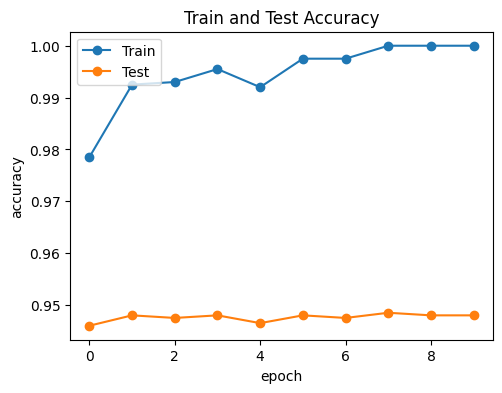

In [30]:
# Plotting train and test accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], '-o')
plt.plot(history.history['val_accuracy'], '-o')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train & Test Accuracy')

Text(0.5, 1.0, 'Train and Test Loss')

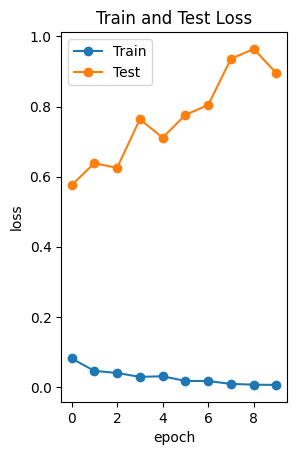

In [31]:
# Plotting train and test loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], '-o')
plt.plot(history.history['val_loss'], '-o')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Train and Test Loss')